# Objetivo

Una gran tienda online nos pidio como analista hacer una recopilacion de hipotesis para ayudar a aumentar los ingresos, esto se realizo en conjunto con el departamento de marketing

-Tenemos que verifircar las hispotesis y listar segun prioridad

-Realizar pruebas A/B para analizar los resultados de estas

In [1]:
import datetime as dt
import math as mth

import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt

In [2]:
df_hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=";")
df_orders = pd.read_csv('/datasets/orders_us.csv')
df_visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
print(df_hipotesis)
print(df_orders)
print(df_visits)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  
      transactionId   visitorId        date  reve

In [4]:
print(df_orders.isna().sum())
print(df_visits.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date      0
group     0
visits    0
dtype: int64


In [5]:
print(df_orders.duplicated().sum())
print(df_visits.duplicated().sum())

0
0


## Priorizar hipotesis

In [6]:
df_hipotesis['ICE'] = (df_hipotesis['Impact'] * df_hipotesis['Confidence'])/df_hipotesis['Effort']

df_hipotesis['RICE'] = (df_hipotesis['Reach'] * df_hipotesis['Impact'] * df_hipotesis['Confidence'])/df_hipotesis['Effort']

print(df_hipotesis)

                                          Hypothesis  Reach  Impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   Confidence  Effort        ICE   RICE  
0           8       6  13.333333   40.0  
1           4      10   2.000000    4.0  
2           7       3   7.000000   56.0  
3           3       8   1.125000    9.0  
4           1       1   1.000000    3.0  
5           2       3   1.333333    4

In [7]:
print(df_hipotesis[['Hypothesis','ICE']].sort_values('ICE',ascending=False))
print()
print(df_hipotesis[['Hypothesis','RICE']].sort_values('RICE',ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2

-segun el puntaje por metodo ICE se priorizaron la hipotesis que tiene alta confianza, un esfuerzo medio y alto impacto

-Segun el puntajen por el metodo RICE se priorizan las hipotesis que tiene mayor alcance, un impacto y confinza altos y un esfuerzo medio

-El metodo RICE parace ser mas conveniente ya que indica el alcance (usuarios) que produciria la implementacion de algunas de estas estrategias o funcionalidades a la pagina web.

-Tambien se considera que la hipotesis 0 (Add two new channels for...) y 7 (Add a subscription form to...) estan en el top 3 en ambos puntajes por lo cual estan son la hipotesis a considerar para posterioremente relizar una prueba A/B

## 1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

In [8]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
df_orders['date'] = pd.to_datetime(df_orders['date'])
df_visits['date'] = pd.to_datetime(df_visits['date'])
df_orders.info()
print(df_orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB
      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     30.4     B
1        2804400009  3642806036 2019-08-15     15.2     B
2        2961555356  4069496402 2019-08-15     10.2     A
3        3797467345  1196621759 2019-08-15    155.1     B
4        2282983706  2322279887 2019-08-15     40.5     B
...             ...         ...        ...      ...   ...
1192     2662137336  3733762160 2019-08-14    100

In [10]:
datesGroup = df_orders[['date','group']].drop_duplicates()

ordersAcu = datesGroup.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], 
                                                                df_orders['group']== x['group'])].agg({'date':'max',
                                                                                                    'group':'max',
                                                                                                    'transactionId':pd.Series.nunique,
                                                                                                    'visitorId':pd.Series.nunique,
                                                                                                    'revenue':'sum'}),axis=1).sort_values(by=['date','group'])

In [11]:
visitsAcu = datesGroup.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'],df_visits['group']==x['group'])].agg({'date':'max',
                                                                                                                                     'group':'max',
                                                                                                                                     'visits':'sum'}),axis=1).sort_values(by=['date','group'])

In [12]:
print(visitsAcu)

          date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845
..         ...   ...     ...
496 2019-08-29     B   17708
730 2019-08-30     A   18037
690 2019-08-30     B   18198
958 2019-08-31     A   18736
930 2019-08-31     B   18916

[62 rows x 3 columns]


In [13]:
datosAcu = ordersAcu.merge(visitsAcu, left_on=['date','group'],right_on=['date','group'])
datosAcu.columns = ['date','group','transactions','buyers','revenue','visitors']
print(datosAcu)

         date group  transactions  buyers  revenue  visitors
0  2019-08-01     A            24      20   2356.8       719
1  2019-08-01     B            21      20   1620.0       713
2  2019-08-02     A            44      38   3860.3      1338
3  2019-08-02     B            45      43   4243.8      1294
4  2019-08-03     A            68      62   5675.5      1845
..        ...   ...           ...     ...      ...       ...
57 2019-08-29     B           596     544  87343.0     17708
58 2019-08-30     A           545     493  63563.5     18037
59 2019-08-30     B           620     567  90736.3     18198
60 2019-08-31     A           557     503  64554.9     18736
61 2019-08-31     B           640     586  92840.6     18916

[62 rows x 6 columns]


In [14]:
acuA = datosAcu[datosAcu['group']=='A']
acuB = datosAcu[datosAcu['group']=='B']

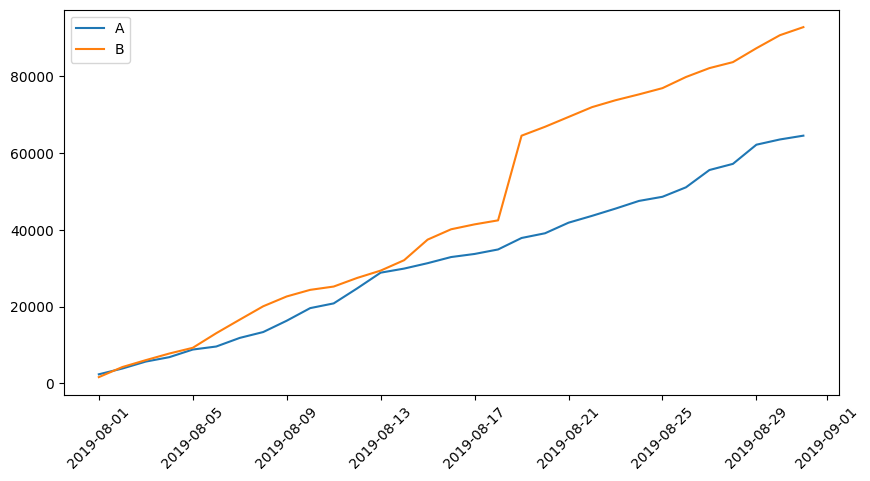

In [15]:
plt.figure(figsize=(10,5))
plt.plot(acuA['date'],acuA['revenue'],label='A')
plt.plot(acuB['date'],acuB['revenue'],label='B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

-Tanto el grupo A como B tenian similitudes en sus ingresos pero claramente el grupo B obtuvo mas ganacias que el grupo A

-Lo anterior se puede deber a un gran numero de ventas en un tiempo determinado o a alguna orden con un precio muy elevado 

## 2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. 

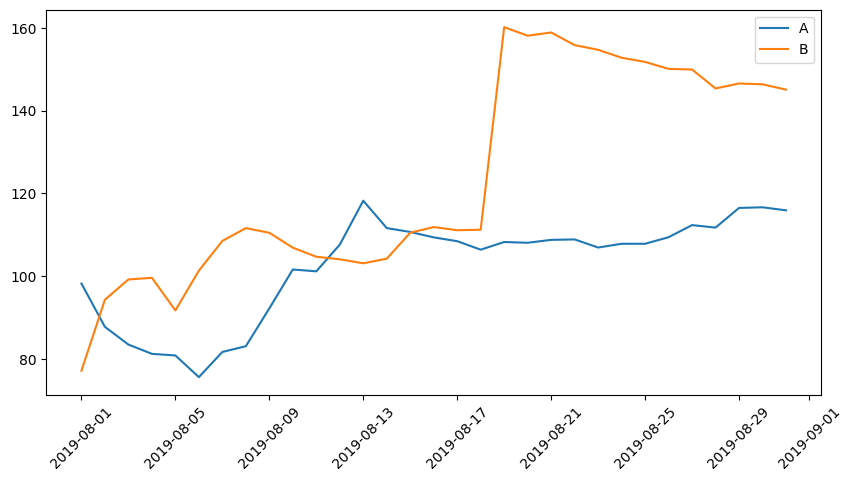

In [16]:
plt.figure(figsize=(10,5))
plt.plot(acuA['date'], acuA['revenue']/acuA['transactions'],label='A')
plt.plot(acuB['date'], acuB['revenue']/acuB['transactions'],label='B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

-El  compra promedio del grupo A empieza con un curva que luego se estabiliza al final 

-La compra promedio del grupo B empieza de forma creciente y tiene un alza significativa y luego de esto se estabiliza

-Se puede ver que el grupo B supero nuevamente al grupo A pero el comportamiento del grupo B es un poco peculiar lo que puede indicar que tenga un numero de ventas demasiada alta en algunas fechas o un compra fuera de lo normal en cuanto a precio

## 3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

In [17]:
mergeAcuPedidos = acuA.merge(acuB,left_on='date',right_on='date',how='left',suffixes=['A','B'])
print(mergeAcuPedidos)

         date groupA  transactionsA  buyersA  revenueA  visitorsA groupB  \
0  2019-08-01      A             24       20    2356.8        719      B   
1  2019-08-02      A             44       38    3860.3       1338      B   
2  2019-08-03      A             68       62    5675.5       1845      B   
3  2019-08-04      A             84       77    6822.1       2562      B   
4  2019-08-05      A            109      100    8810.2       3318      B   
5  2019-08-06      A            127      114    9600.0       3985      B   
6  2019-08-07      A            145      131   11842.9       4629      B   
7  2019-08-08      A            161      146   13373.3       5239      B   
8  2019-08-09      A            177      159   16320.4       5856      B   
9  2019-08-10      A            193      175   19608.6       6262      B   
10 2019-08-11      A            206      187   20838.3       6980      B   
11 2019-08-12      A            230      210   24749.1       7575      B   
12 2019-08-1

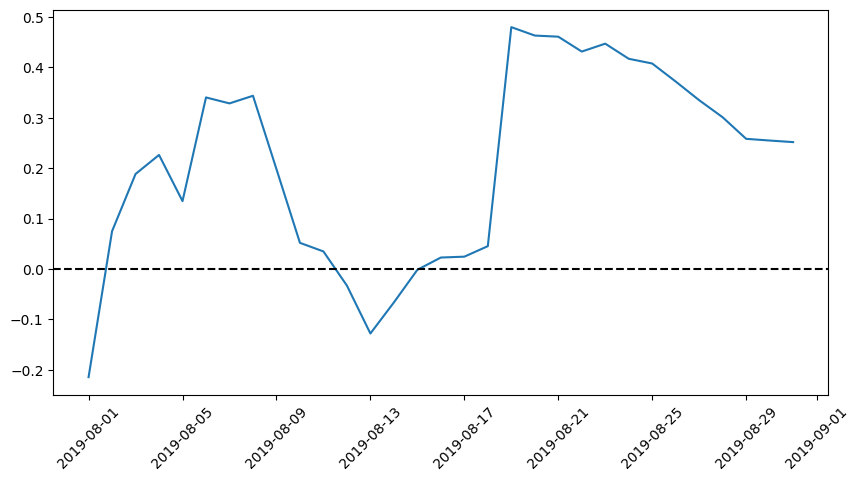

In [18]:
plt.figure(figsize=(10,5))
plt.plot(mergeAcuPedidos['date'],(mergeAcuPedidos['revenueB']/mergeAcuPedidos['transactionsB'])/(mergeAcuPedidos['revenueA']/mergeAcuPedidos['transactionsA'])-1)
plt.axhline(y=0,color='black',linestyle='--')
plt.xticks(rotation=45)
plt.show()

-En varios puntos la diferencia entre los segmentos aumenta y como se puede ver tambien disminuye 

-Lo anterior puede deberse como se viene concluyendo en valores atipicos en las ordenes ya sea una gran cantidad de estas o una con precio muy alto 

## 4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos 

In [19]:
datosAcu['conversion'] = datosAcu['transactions']/datosAcu['visitors']
conversionacuA = datosAcu[datosAcu['group']=='A']
conversionacuB = datosAcu[datosAcu['group']=='B']

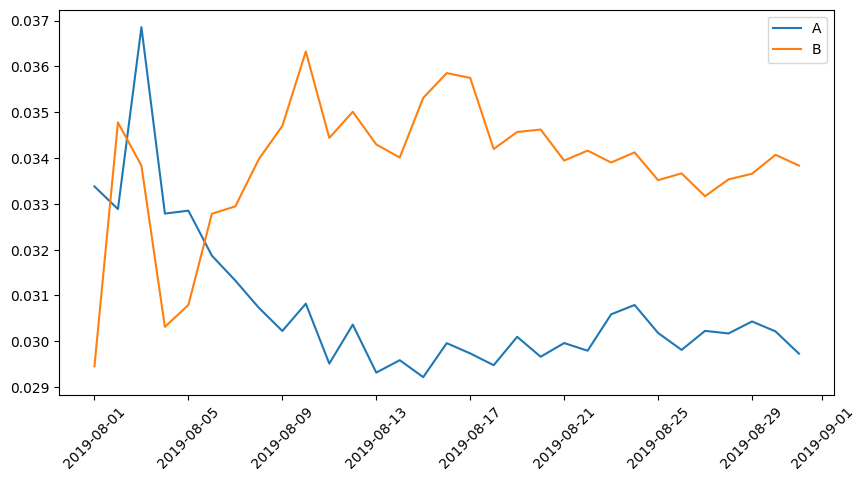

In [20]:
plt.figure(figsize=(10,5))
plt.plot(conversionacuA['date'],conversionacuA['conversion'],label='A')
plt.plot(conversionacuB['date'],conversionacuB['conversion'],label='B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

-La tasa de converion del grupo A fue mayor en su inicio pero esta fue declinando con el tiempo 

-La tasa de conversion del grupo B fue inferior al grupo en su inicio por luego esta aumento considerablemente en relacion con el grupo A

-Por lo que se puede ver el grupo B tuve un mayor interes en realizar pedidos conforme se realizo la prueba.

## 5 Traza un gráfico de dispersión del número de pedidos por usuario.

In [37]:
print(df_orders['transactionId'].duplicated().sum())

0


          UserId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
...          ...     ...
359   1484903144       1
360   1485964287       1
361   1494664757       1
362   1495112755       1
1030  4283872382       1

[1031 rows x 2 columns]


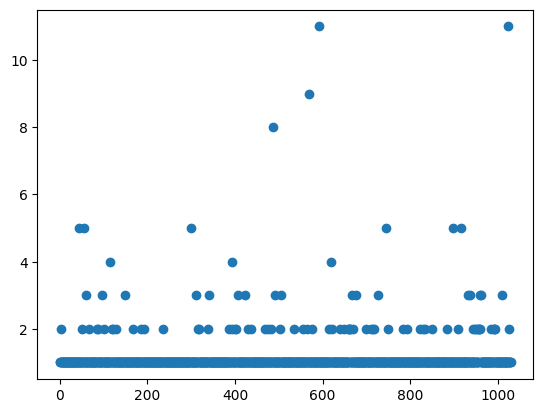

In [39]:
orderByUser = df_orders.drop(['date','revenue','group'],axis=1).groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
orderByUser.columns = ['UserId','orders']
print(orderByUser.sort_values(by='orders',ascending=False))

xv = pd.Series(range(0,len(orderByUser)))
plt.scatter(xv,orderByUser['orders'])
plt.show()

-Del registro de ordenes quer se posee se puede apreciar que los usuarios registrados en general realizaron una sola orden ya que en el grafico de dispersion es practicamente una linea continua
-Los usuarios que realizan 3 o mas compras son escazos por lo que podrian ser catalagodos como datos anomalos

## 6 Calcula los percentiles 95 y 99 del número de pedidos por usuario.

In [40]:
print(np.percentile(orderByUser['orders'],[95,99]))

[2. 4.]


-No mas del 5% de los usuarios realizan 2 o mas ordenes

-No mas del 1% de los usuarios relizan 4 o mas ordenes

-El umbral de pedidos se dejara en 2 ordenes el cual seria un comportamiento normal para un usuario para este analisis

## 7 Traza un gráfico de dispersión de los precios de los pedidos.

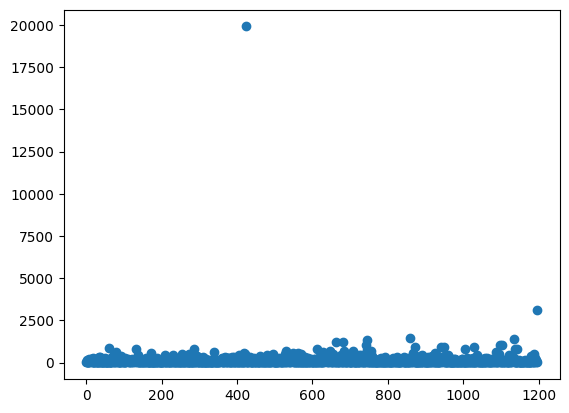

In [41]:
x_values = pd.Series(range(0,len(df_orders['revenue'])))
plt.scatter(x_values,df_orders['revenue'])
plt.show()

-La gran mayoria de las ordenes esta por debajo de los 2500

-Los datos muy extremos que en este caso es en los 20000 puede ser una sola persona en una orden muy grande lo cual no es un comportamiento normal de los usuarios 


## 8 Calcula los percentiles 95 y 99 de los precios de los pedidos. 

In [42]:
print(np.percentile(df_orders['revenue'],[95,99]))

[435.54  900.904]


-No mas del 5% cuesta 436 o mas en las ordenes o pedidos

-No mas del 1% cuesta 900 o mas en sus ordenes

-El umbral de ordenes se dejara en 436 el cual seria un comportamiento normal para un usuario para este analisis

## 9 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto.

In [45]:
print(df_visits)

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756
..        ...   ...     ...
57 2019-08-27     B     720
58 2019-08-28     B     654
59 2019-08-29     B     531
60 2019-08-30     B     490
61 2019-08-31     B     718

[62 rows x 3 columns]


In [47]:
orderByUserA = df_orders[df_orders['group']=='A'].groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
orderByUserA.columns=['userId','orders']
orderByUserB = df_orders[df_orders['group']=='B'].groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
orderByUserB.columns=['userId','orders']

muestraA = pd.concat([orderByUserA['orders'],pd.Series(0,index=np.arange(
    df_visits[df_visits['group']=='A']['visits'].sum()-len(orderByUserA['orders'])),name='orders')],axis=0)

muestraB = pd.concat([orderByUserA['orders'],pd.Series(0,index=np.arange(
    df_visits[df_visits['group']=='B']['visits'].sum()-len(orderByUserA['orders'])),name='orders')],axis=0)


In [75]:
print(st.mannwhitneyu(muestraA,muestraB)[1])

print((muestraB.mean()/muestraA.mean()-1))

0.8778530458242377
-0.009515753859166809


-El valor de alpha valor de significancia es 0.05 segun el resultado de la prueba no hay diferencia estadistica entra las 2 muestras al ser esta mayor a 0.05

-La perdida relativa del grupo B es de un 0.9% 

## 10 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto.

In [56]:
print(st.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'],df_orders[df_orders['group']=='B']['revenue'])[1])
print(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1)

0.6915246773264736
0.25165300678182456


-No hay una diferencia estadisticas en el tamaño promedio de pedidos ya que el valor de p es superior a 0.05(alpha o valor de significancia)

-El tamaño de pedido promedio es mayor para el grupo B

## 11 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [67]:
userMuchasOrdenes = pd.concat([orderByUserA[orderByUserA['orders']>2]['userId'],orderByUserB[orderByUserB['orders']>2]['userId']],axis=0)
userOrdenCara = df_orders[df_orders['revenue']>436]['visitorId']
userAnormales = pd.concat([userMuchasOrdenes,userOrdenCara],axis=0).drop_duplicates().sort_values()

print(userAnormales)
print(userAnormales.shape)

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Length: 73, dtype: int64
(73,)


In [68]:
filtroMuestraA = pd.concat([orderByUserA[np.logical_not(orderByUserA['userId'].isin(userAnormales))]['orders'],
                            pd.Series(0,index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum()-len(orderByUserA['orders'])),
                                      name='orders')],axis=0)

filtroMuestraB = pd.concat([orderByUserB[np.logical_not(orderByUserB['userId'].isin(userAnormales))]['orders'],
                            pd.Series(0,index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum()-len(orderByUserB['orders'])),
                                      name='orders')],axis=0)

In [76]:
print(st.mannwhitneyu(filtroMuestraA ,filtroMuestraB)[1])
print(filtroMuestraB.mean()/filtroMuestraA.mean()-1)

0.009226229938684357
0.18156103016892322


-El valor de alpha valor de significancia es 0.05 segun el resultado de la prueba no hay diferencia estadistica entra las 2 muestras al ser esta mayor a 0.05

-La ganancia relativa del grupo B es de un 18% 

## 12 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados.

In [77]:
print(st.mannwhitneyu(df_orders[np.logical_and(df_orders['group']=='A',np.logical_not(df_orders['visitorId'].isin(userAnormales)))]['revenue'],
                     df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(userAnormales)))]['revenue'])[1])

print(df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorId'].isin(userAnormales)))]['revenue'].mean() / 
                     df_orders[np.logical_and(df_orders['group']=='A',np.logical_not(df_orders['visitorId'].isin(userAnormales)))]['revenue'].mean()-1)

0.743836016813833
-0.028039551205237823


-No hay una diferencia estadistica entre el tamaño promedio de pedidos ya que p es superior a alpha(0.05)

-la perdida relativa promedio fue de un 2%

-Con los resultados del analisis con los datos filtrados se puede ver que diferencia relativa aumento por lo que los pedidos anomalos eran los que resaltaban a simple vista que el grupo B era mejor

## 13 Toma una decisión basada en los resultados de la prueba. 

-Como se ha podido ver en el analisis no existe una gran diferencia estadisticas entre las muestras 

-Mediante la filtracion de los datos se pudo ver que el grupo B que era el grupo mas prometedor inicialmente en cuanto a promedio de pedidos era ligeramente inferior al grupo A por

-Se aconseja parar la prueba ya que los 2 grupos no tienen una diferencia estadisticas significativa que permita seleccionar uno de los 2 grupos 